In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import matplotlib.pyplot as plt

![Sample Pairing Augmentation Strategy](https://imgur.com/7eBoLcA.png)

In [2]:
!mkdir ./shopee_augmented_data 
!cp -r ../input/shopee-product-matching/train_images ./shopee_augmented_data/train_images
!cp -r ../input/shopee-product-matching/test_images ./shopee_augmented_data/test_images

In [3]:
train_df = pd.read_csv('../input/shopee-product-matching/train.csv')
train_df2 = train_df.copy()
train_df2['image'] = train_df2['image'].map(lambda x: 'aug1_'+x)
train_output_df = pd.concat([train_df, train_df2], axis=0)
train_output_df.shape
train_output_df.to_csv('./shopee_augmented_data/train.csv', index=False)

In [4]:
test_df = pd.read_csv('../input/shopee-product-matching/test.csv')
test_df2 = test_df.copy()
test_df2['image'] = test_df2['image'].map(lambda x: 'aug1_'+x)
test_output_df = pd.concat([test_df, test_df2], axis=0)
test_output_df.shape
test_output_df.to_csv('./shopee_augmented_data/test.csv', index=False)

In [5]:
datagen = ImageDataGenerator(
           #rotation_range=40,
           width_shift_range=0.2,
           height_shift_range=0.2,
           #shear_range=0.2,
           zoom_range=0.2,
           horizontal_flip=True,
           vertical_flip=False,
           fill_mode='nearest')


def simple_augment(img_name, train=True):
    input_path = '../input/shopee-product-matching/train_images/'+img_name if train else '../input/shopee-product-matching/test_images/'+img_name
    output_path = './shopee_augmented_data/train_images/'+'aug1_'+img_name if train else './shopee_augmented_data/test_images/'+'aug1_'+img_name
    img = keras.preprocessing.image.load_img(input_path)
    x = keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    g = datagen.flow(x, batch_size=1)
    g = np.squeeze(g[0])
    img = keras.preprocessing.image.array_to_img(g, scale=True)
    img.save(output_path)

def pairing_sample(img_name, train=True):
    base_image_path = '../input/shopee-product-matching/train_images/'+img_name if train else '../input/shopee-product-matching/test_images/'+img_name
    over_image_path = '../input/shopee-product-matching/train_images/'+train_df['image'].sample().to_string().split()[1] if train else '../input/shopee-product-matching/test_images/'+test_df['image'].sample().to_string().split()[1]
    output_path = './shopee_augmented_data/train_images/'+'aug1_'+img_name if train else './shopee_augmented_data/test_images/'+'aug1_'+img_name
    
    # basic data augmentation
    base_img = keras.preprocessing.image.load_img(base_image_path)
    x = keras.preprocessing.image.img_to_array(base_img)
    x = x.reshape((1,) + x.shape)
    g = datagen.flow(x, batch_size=1)
    g = np.squeeze(g[0])
    base_img = keras.preprocessing.image.array_to_img(g, scale=True)
    
    over_img = keras.preprocessing.image.load_img(over_image_path)
    x = keras.preprocessing.image.img_to_array(over_img)
    x = x.reshape((1,) + x.shape)
    g = datagen.flow(x, batch_size=1)
    g = np.squeeze(g[0])
    over_img = keras.preprocessing.image.array_to_img(g, scale=True)
    over_img = over_img.resize(base_img.size) # 重ねる画像のサイズを元画像に合わせる
    
    # pairing sample
    img = Image.blend(base_img, over_img, 0.5)
    img.save(output_path)
    

In [6]:
for img_name in tqdm(train_df['image'].to_list()):
    pairing_sample(img_name, train=True)

100%|██████████| 34250/34250 [3:10:43<00:00,  2.99it/s]


In [7]:
for img_name in tqdm(test_df['image'].to_list()):
    pairing_sample(img_name, train=False)

100%|██████████| 3/3 [00:01<00:00,  2.96it/s]


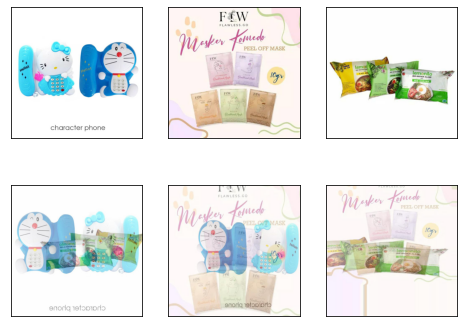

In [8]:
n_data = 6 # 表示するデータ数
row=2 # 行数
col=3 # 列数
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(8,6))

for i, img_name in enumerate(test_output_df['image'].to_list()):
    filename = './shopee_augmented_data/test_images/'+img_name
    img = Image.open(filename, 'r')  # 画像読み込み
    _r= i//col
    _c= i%col
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(np.array(img))

In [9]:
!zip -r shopee_augmented_data.zip shopee_augmented_data
!rm -rf shopee_augmented_data

  adding: shopee_augmented_data/ (stored 0%)
  adding: shopee_augmented_data/test.csv (deflated 59%)
  adding: shopee_augmented_data/train_images/ (stored 0%)
  adding: shopee_augmented_data/train_images/7374366a80199355d1894b161c295ad4.jpg (deflated 15%)
  adding: shopee_augmented_data/train_images/aug1_5250d36dbb584fa707f0f121b762299b.jpg (deflated 8%)
  adding: shopee_augmented_data/train_images/aug1_c6b6ebc511d0bb8ff3796560ee9efd0b.jpg (deflated 3%)
  adding: shopee_augmented_data/train_images/0a1f72b12dee7317f586fa7f155dd681.jpg (deflated 17%)
  adding: shopee_augmented_data/train_images/aug1_bea9a8d5159998aef029bef953f4c2f7.jpg (deflated 10%)
  adding: shopee_augmented_data/train_images/f17dbf8a1d39bc0168701dc969367563.jpg (deflated 4%)
  adding: shopee_augmented_data/train_images/ae1fcdd8c2f482e3749b5ff7c556c233.jpg (deflated 16%)
  adding: shopee_augmented_data/train_images/3f3c5f694c05d30d4695211b1c4f55f1.jpg (deflated 11%)
  adding: shopee_augmented_data/train_images/85cfdb50